In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nyc_data = pd.read_csv('https://raw.githubusercontent.com/DanielleRomanoff/DS-Unit-1-Project_Dog_Bites/master/NYC%20dog%20bite%20data.csv')
nyc_data.shape

(8707, 9)

In [127]:
nyc_data.sort_values(by = 'Breed').head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
2701,2696,July 17 2016,DOG,/SHIH TZU MIX,3,M,False,Bronx,10457
8260,8261,June 23 2016,DOG,2 DOGS: TERR X & DOBERMAN,3 & 4,F,True,Staten Island,10306
4838,4833,May 11 2017,DOG,AFRICAN BOERBOEL,3,M,False,Manhattan,10025
3899,3895,September 10 2015,DOG,AIREDALE TERRIER,2,M,True,Manhattan,10011
2196,2191,July 09 2015,DOG,AKITA/CHOW CHOW,2,M,False,Bronx,10459


In [160]:
nyc_data = nyc_data.drop(nyc_data.loc[nyc_data['Gender'] == 'U'].index)
nyc_data.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,8140,December 02 2015,DOG,Pug,7,F,True,Staten Island,NaN
1,1,January 27 2015,DOG,Jack Russ,11,M,False,Brooklyn,11217
4,4,December 26 2014,DOG,Doberman Pinscher,NaN,M,False,Brooklyn,11204
6,6,January 31 2015,DOG,Chihuahua Crossbreed,3,M,False,Brooklyn,NaN
7,7,January 31 2015,DOG,German Shepherd Crossbreed,NaN,F,False,Brooklyn,11220


In [161]:
pd.set_option('display.max_rows', 1000)
nyc_data.isna().sum()

UniqueID        0
DateOfBite      0
Species         0
Breed           0
Age           354
Gender          0
SpayNeuter      0
Borough         0
ZipCode       819
dtype: int64

In [167]:
nyc_data_new = nyc_data.groupby(['Breed', 'Gender', 'SpayNeuter']).count().sort_values(by = ['Breed', 'UniqueID'], ascending = False)
nyc_data_modified = nyc_data_new.drop(index = ['UNKNOWN', 'Mixed/Other', 'TERRIER', 'MIXED', 'MIXED BREED', 'PIT BULL MIX', 'LABRADOR MIX', 'HUSKY', 'SHEPHERD', 'SHEPERD', 'MUTT', 'TERRIER MIX'])
nyc_bite_data = nyc_data_modified[nyc_data_modified.UniqueID >= 25]
nyc_bite_final = pd.DataFrame(nyc_bite_data, columns = ['UniqueID'])
nyc_bite_final.head()

/Users/danielleromanoff/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3111: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



UniqueID
Breed             Gender SpayNeuter          
Yorkshire Terrier M      True              68
                         False             41
Siberian Husky    M      False             29
                         True              28
Shih Tzu          M      False            117

In [163]:
nyc_bite_final.shape

(37, 1)

In [164]:
males = nyc_data[nyc_data['Gender'] == 'M']
# ['Breed'].value_counts()
# nyc_data.Gender.value_counts()
neuters = males[males['SpayNeuter'] == True]
unneutered = males[males['SpayNeuter'] != True]
# males['SpayNeuter'].value_counts()
neutered_males = neuters['Breed'].value_counts().head(15)
unneutered_males = unneutered['Breed'].value_counts().head(14)
print(neutered_males)
print(unneutered_males)

Pit Bull                                193
Shih Tzu                                 82
American Pit Bull Mix / Pit Bull Mix     80
Yorkshire Terrier                        68
Chihuahua                                68
German Shepherd                          64
Maltese                                  53
Labrador Retriever                       48
American Pit Bull Terrier/Pit Bull       47
Mixed/Other                              39
Jack Russ                                36
Labrador Retriever Crossbreed            31
Siberian Husky                           28
Cocker Spaniel                           27
Beagle                                   26
Name: Breed, dtype: int64
Pit Bull                                394
American Pit Bull Mix / Pit Bull Mix    133
Shih Tzu                                117
American Pit Bull Terrier/Pit Bull      109
Chihuahua                                72
German Shepherd                          69
Mixed/Other                              62
Rottwe

In [169]:
females = nyc_data[nyc_data['Gender'] == 'F']
# ['Breed'].value_counts()
# nyc_data.Gender.value_counts()
spayed = females[females['SpayNeuter'] == True]
not_spayed = females[females['SpayNeuter'] != True]
# females['SpayNeuter'].value_counts()
spayed_females = spayed['Breed'].value_counts().head(4)
not_spayed_females = not_spayed['Breed'].value_counts().head(6)
print(spayed_females)
print(not_spayed_females)

Pit Bull                                108
American Pit Bull Mix / Pit Bull Mix     51
American Pit Bull Terrier/Pit Bull       36
German Shepherd                          25
Name: Breed, dtype: int64
Pit Bull                                167
American Pit Bull Mix / Pit Bull Mix     50
Shih Tzu                                 44
American Pit Bull Terrier/Pit Bull       36
German Shepherd                          30
Chihuahua                                26
Name: Breed, dtype: int64


In [93]:
pa_data = pd.read_csv('https://raw.githubusercontent.com/DanielleRomanoff/DS-Unit-1-Project_Dog_Bites/master/PA%20Dangerous%20Dogs%201996-Current.csv')
pa_data.shape

(5565, 18)

In [94]:
pa_data.head()

,File Date,Determination Year,Status Description,County Description,Dog Info Age,Dog Info Breed,Dog Info Predator,County Key,Owner County,Court Disposition,Hearing Date,Owner First Name,Owner Last Name,Owner Address,Owner City,Owner State,Owner Zip,Location
0,12/12/2002,2002,Closed,BUCKS (7),2 YRS.,MIXED BREED,Dog,9,BUCKS (7),Guilty,02/28/2003,DAVID,GERSENSON,PO BOX 432,REVERE,PA,18953.0,"PO BOX 432\nREVERE, PA 18953"
1,06/30/2003,2003,Deceased,ALLEGHENY (4),11 YRS.,MIXED BREED,Dog,2,ALLEGHENY (4),Guilty,06/30/2003,SHANEA,NAKONECNY,2208 ORCHARD HILL ROAD,JEFFERSON HILLS,PA,15025.0,"2208 ORCHARD HILL ROAD\nJEFFERSON HILLS, PA 15025"
2,07/09/2003,2003,Deceased,BRADFORD (3),7 YRS.,Rottweiler,Dog,8,BRADFORD (3),Guilty,07/09/2003,THERON,WICKWIRE,"RR 2, BOX 100",WYSOX,PA,18854.0,"RR 2, BOX 100\nWYSOX, PA 18854"
3,06/10/2004,2004,Deceased,WESTMORELAND (4),ADULT,MIXED BREED,Dog,65,WESTMORELAND (4),Guilty,06/10/2004,VERONICA,SIMMS,RT 982 HOUSE 520,NEW DERRY,PA,15627.0,"RT 982 HOUSE 520\nNEW DERRY, PA 15627"
4,06/09/2004,2004,Closed,WYOMING (3),9 YRS.,Labrador Retriever,Dog,66,WYOMING (3),Guilty,06/03/2004,KIMBERLY,MERRYMAN,"RR 1, BOX 81",NOXEN,PA,18636.0,"RR 1, BOX 81\nNOXEN, PA 18636"


In [168]:
pa_data_new = pa_data.groupby(['Dog Info Breed', 'Court Disposition', 'Status Description']).count().sort_values(by = ['Dog Info Breed', 'Location'], ascending = False)
pa_data_modified = pa_data_new.drop(index = ['UNKNOWN', 'OTHER', 'MIXED BREED', 'Mastiff'])
pa_bite_data = pa_data_modified[pa_data_modified['Location'] >= 25]
pa_bite_final = pd.DataFrame(pa_bite_data, columns = ['Location'])
pa_bite_final

/Users/danielleromanoff/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3111: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Location
Dog Info Breed            Court Disposition Status Description             
Rottweiler                Guilty            Deceased                     57
                                            Closed                       40
                          Not Guilty        Closed                       38
                          Guilty            Deceased Dog                 25
MIXED BREED: Pit Bull Mix Guilty            Euthanized                   26
Labrador Retriever        Guilty            Deceased                     30
                          Not Guilty        Closed                       25
German Shepherd           Guilty            Deceased                     81
                          Not Guilty        Closed                       54
                          Other             Deceased                     51
                                            Closed                       42
                          Guilty            Closed                       41
                                            Deceased Dog                 40
                          Dismissed         Closed                       37
American Pit Bull Terrier Guilty            Deceased                    305
                                            Closed                      171
                                            Deceased Dog                166
                          Not Guilty        Closed                      161
                          Guilty            Euthanized                  135
                                            Open                        115
                          Other             Closed                      106
                          Dismissed         Closed                       98
                          Guilty            Registered                   55
                          Ruling Pending    Pending Determination        52
                          Guilty            Out-of-State                 47
                          Other             Deceased                     43
                          Guilty            City Limits                  37
                                            Pending Charges              26

In [171]:
decision = pa_data[pa_data['Court Disposition'] == 'Guilty']

euthanized = decision[decision['Status Description'] == 'Euthanized']
deceased = decision[decision['Status Description'] == 'Deceased']

guilty_euth = euthanized['Dog Info Breed'].value_counts().head(4)
guilty_deceased = deceased['Dog Info Breed'].value_counts().head(6)
print(guilty_euth)
print(guilty_deceased)

American Pit Bull Terrier    135
MIXED BREED: Pit Bull Mix     26
MIXED BREED                   25
German Shepherd               17
Name: Dog Info Breed, dtype: int64
American Pit Bull Terrier    305
MIXED BREED                  141
German Shepherd               81
Rottweiler                    57
Labrador Retriever            30
Boxer                         18
Name: Dog Info Breed, dtype: int64


AttributeError: 'Spine' object has no attribute 'set_visable'

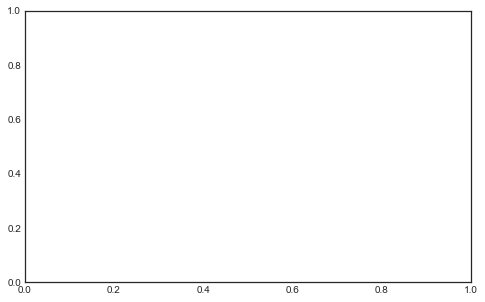

In [100]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize = (8, 5), facecolor = 'white')
ax.grid(False)
ax.spines['right'].set_visable(False)
ax.spines['top'].set_visable(False)

# Line 1
plt.plot(spayed_females, not_spayed_females , color = 'purple')
fig.text(0.15, 0.5, 'Breed', size = 'medium', color = 'purple', weight = 'bold')

# Line 2
plt.plot(pa_bite_final['Dog Info Breed'], pa_bite_final['Location'], color = 'red')
fig.text(0.15, 0.5, 'Dog Info Breed', size = 'medium', color = 'red', weight = 'bold')

plt.xticks(['Breed'])

# Title
fig.suptitle('Number of Bites per Breed', fontsize = 15, weight = 'bold', horizontalalignment = 'left', x = 0.15, y = 1)

ax.set_title('Number of each breed registered unknown', horizontalalignment = 'left', x = 0.9, y = 1, fontsize = 10);

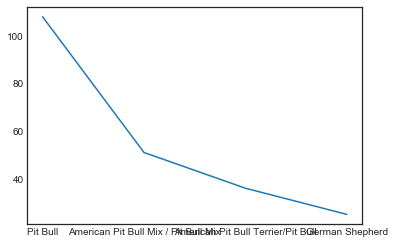

In [170]:
plt.plot(spayed_females)